In [2]:
import sentiment_analysis_functions as saf
#import lda as lda
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
from textblob import TextBlob
from pycontractions import Contractions
cont = Contractions(api_key="glove-twitter-25")
cont.load_models()
dir = "/volumes/Hayley's Drive/PycharmProjects/twilightvalefalls/"

/Users/homeworkdude/anaconda3/envs/nlp2/lib/python3.6/site-packages/smart_open/smart_open_lib.py:160: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, keywords, defaults = inspect.getargspec(kallable)


In [14]:
rs_sa = pd.read_csv(dir + 'rstories/rs_df.csv', sep='|', index_col=0)
rs_sa['date'] = pd.to_datetime(rs_sa['date'])
rs_sa = rs_sa.sort_values(by=['date'])

In [15]:
titles = rs_sa['title']
epis = rs_sa['text']
rssa = saf.sentiment_analysis(dir + 'named_entities_all/rstories_ner.txt')
rssa_dict = dict()

for i,g in enumerate(epis):
    rssa_dict[titles[i]] = rssa.story_analysis(g)

7


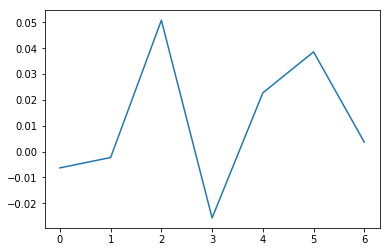

In [16]:
avg_polarity_epi = list()
for entry in rssa_dict:
    avg_polarity_epi.append(rssa_dict.get(entry)[1]['polarity'].mean(axis=0))
plt.plot(range(0,7),avg_polarity_epi)

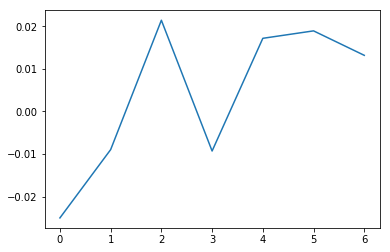

In [17]:
avg_polarity_epi_bg = list()
for entry in rssa_dict:
    avg_polarity_epi_bg.append(rssa_dict.get(entry)[0]['polarity'].mean(axis=0))
plt.plot(range(0,7),avg_polarity_epi_bg)

In [18]:
concat_epis = ' '.join(epis)
cebf, cesf = rssa.story_analysis(concat_epis)

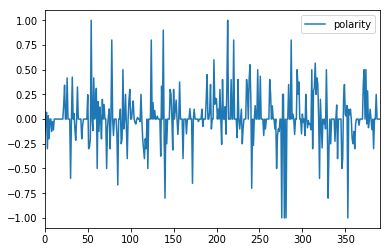

In [19]:
cesf.plot(y='polarity', use_index=True)